interview data数据是某企业证券分析师对股价预测数据，包括分析师、股票代码、行业、股价、预测时间等各种信息，请用Pandas和Numpy，处理数据输出下列问题结果：

1 分析师胜率排名，并输出线图；
	注：线图请注意人类可读性

2 历史数据中，跑赢大盘的行业和企业排名，并输出线图，
	注：线图请注意人类可读性

3 假设在分析师给出估价当天买入股票，保守收益率最高股票代码和对应分析师。
	注：本例可假设区间最低价时间为 “研报发布日15天后的交易日”

加分：

<font color=red>用以下条件回测：根据胜率排名前十的分析师估价，在研报发布时间点买入，达到”估价“时或者”达到估价截止时间时“ 卖出，回测各个分析师的收益情况。</font>
注：操盘条件：每日、1000万人民币资金上限

指数加权移动平均法预测分析师稳定性：截止到2020年8月31日，分析师表现稳定的趋势，系数权重$\beta$取值分别为0.5、0.9，
注：“表现稳定”定义为：分析师胜率越高、股票最大回撤越小被视为表现稳定；



概念备注：

- 胜率定义：获胜数-失败数 / 总预测次数
    - 股价达到估值视为获胜+1
    - 未达到估值视为失败-1


- 最大回撤概念如下：

    是指统计周期内的最大产品净值的时点往后推，当产品净值回落到最低点时，产品收益率的回撤幅度。最大回撤率是一个重要的风险指标。


- 保守收益率概念如下：

    保守收益率＝净利润率－最大回撤率


- 指数加权移动平均：

    指各数值的加权系数随时间呈指数式递减，越靠近当前时刻的数值加权系数就越大。可以参考用padans.Dataframe.ewm等方法解决

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='./SimHei.ttf')

# 1. 分析师胜率排名

In [2]:
# 读取数据
df = pd.read_csv('./interview data.csv')
df.head(n=3)

,分析师,证券公司,代码,股票名称,评级,研报发布时间,行业,申万行业,研报日最新收盘价,目标价,目标区间(个月),区间最高价,区间最低价,最高价时间,目标价预测截至时间,最高价相对目标价涨幅,区间实际最高涨跌幅,研报发布日至最高价日大盘涨跌幅,查看报告
0,樊俊豪,中金公司,603898,好莱客,跑赢行业,2020/10/19,家居用品,轻工制造,17.43,23.0,6,17.6,13.944,2020/10/19,2021/4/19,-23.48%,0.98%,-0.71%,查看报告
1,刘俊,中金公司,2028,思源电气,跑赢行业,2020/10/19,电气设备,电气设备,23.58,30.0,6,23.6,18.864,2020/10/19,2021/4/19,-21.33%,0.08%,-0.82%,查看报告
2,曾韬,中金公司,2028,思源电气,跑赢行业,2020/10/19,电气设备,电气设备,23.58,30.0,6,23.6,18.864,2020/10/19,2021/4/19,-21.33%,0.08%,-0.82%,查看报告


In [3]:
# 剔除无用数据
idx = df[df['区间最高价'] == '--'].index.tolist()

df.drop(labels=idx, axis=0, inplace=True)

In [4]:
# 对预测结果进行判断
df['是否正确'] = df.apply(lambda x: 1 if (float(x['区间最高价']) - float(x['目标价'])) >= 0 else -1, axis=1)
df[167:172]

,分析师,证券公司,代码,股票名称,评级,研报发布时间,行业,申万行业,研报日最新收盘价,目标价,目标区间(个月),区间最高价,区间最低价,最高价时间,目标价预测截至时间,最高价相对目标价涨幅,区间实际最高涨跌幅,研报发布日至最高价日大盘涨跌幅,查看报告,是否正确
167,何伟,中金公司,651,格力电器,跑赢行业,2020/9/17,家用电器,家用电器,55.05,69.7,6,57.94,44.040,2020/10/15,2021/3/17,-16.87%,5.25%,4.72%,查看报告,-1
168,吕若晨,中金公司,603345,安井食品,跑赢行业,2020/9/17,食品,食品饮料,171.08,178.5,6,184,136.864,2020/10/16,2021/3/17,3.08%,7.55%,1.60%,查看报告,1
169,詹奥博,中金公司,600496,精工钢构,跑赢行业,2020/9/17,钢加工,建筑装饰,5.89,10.0,6,6.23,4.712,2020/10/19,2021/3/17,-37.70%,5.77%,0.88%,查看报告,-1
170,周悦琅,中金公司,603345,安井食品,跑赢行业,2020/9/17,食品,食品饮料,171.08,178.5,6,184,136.864,2020/10/16,2021/3/17,3.08%,7.55%,1.60%,查看报告,1
171,胡誉镜,中金公司,2938,鹏鼎控股,跑赢行业,2020/9/16,元器件,电子,54.25,66.6,6,58.84,43.400,2020/10/9,2021/3/16,-11.65%,8.46%,1.11%,查看报告,-1


In [5]:
# 聚合统计并排序
df1 = df.groupby('分析师')['是否正确'].agg(np.mean)
df1 = df1.sort_values(ascending=False)
df1.head()

分析师
丁宁黄乐平    1.000000
王婧如      1.000000
王宇翔      1.000000
王亦沁      0.578947
周悦琅      0.538462
Name: 是否正确, dtype: float64

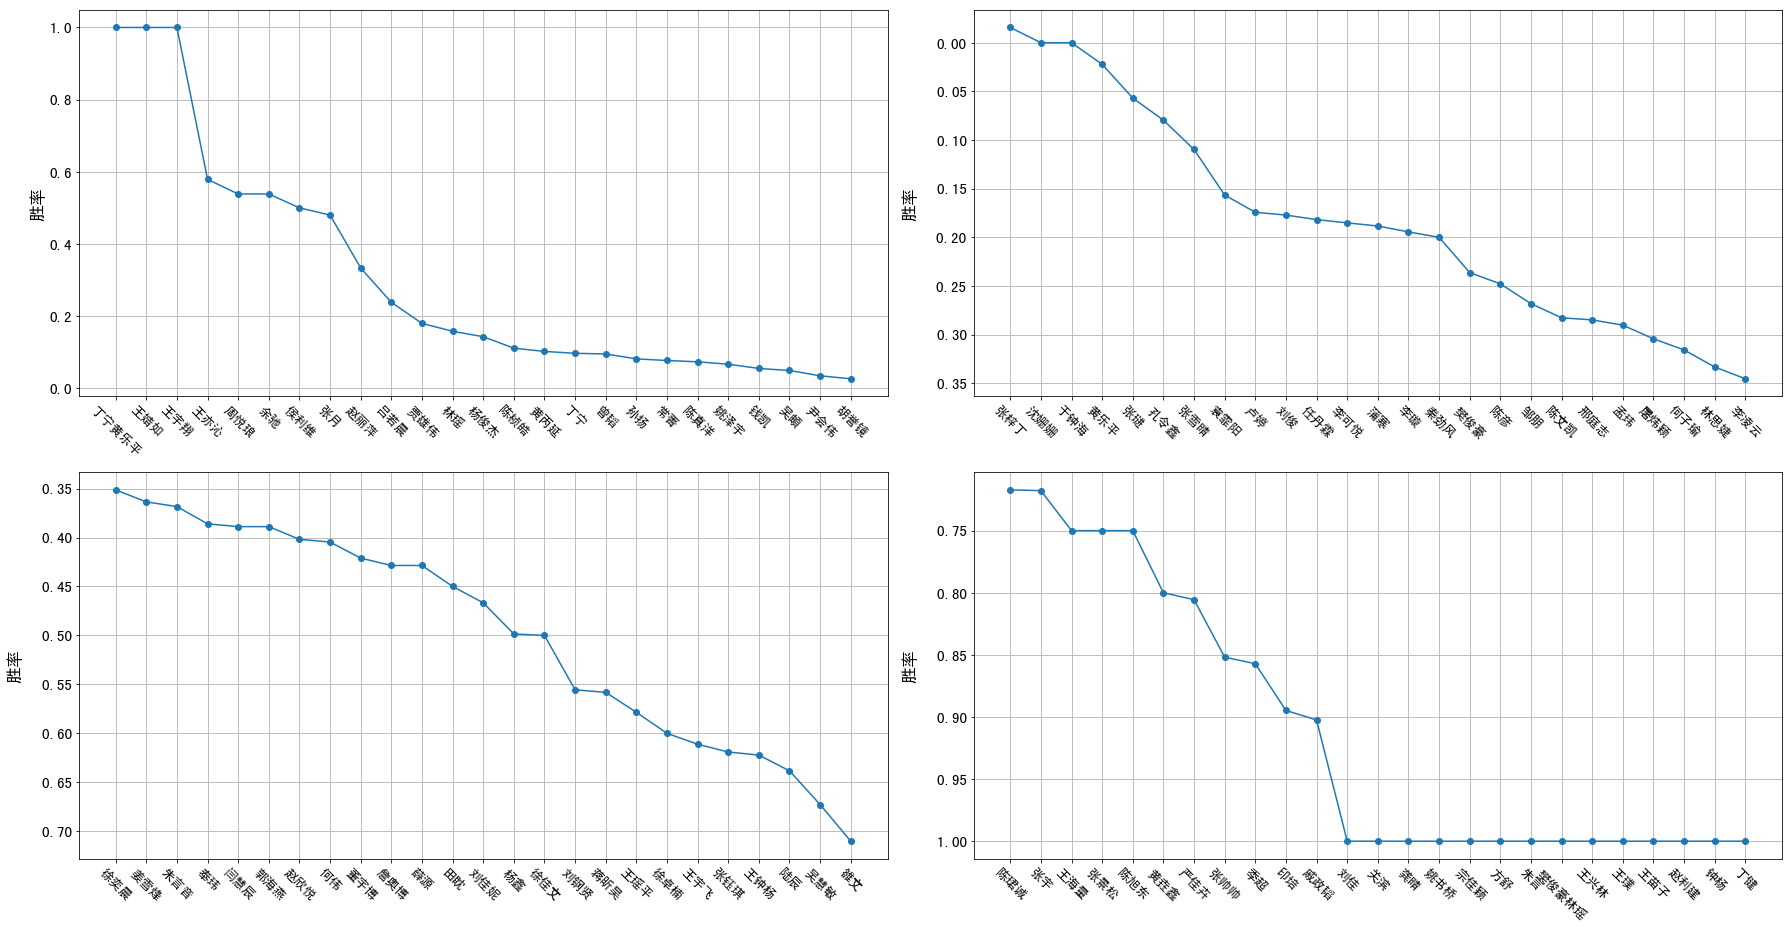

In [6]:
# 绘制线图
def plot_line(names, ratio):
    plt.plot(names, ratio, 'o-')
    plt.ylabel('胜率', fontproperties=font, fontsize=17)
    plt.xticks(fontproperties=font, fontsize=13, rotation=-45.0)
    plt.yticks(fontproperties=font, fontsize=15)
    plt.grid()

# 每25名分析师放一张图上
batch_size = 25

names = df1.index.tolist()
ratio = df1.values.tolist()

len_ = len(names)
batch_num = len_ // batch_size if len_ % batch_size == 0 else (len_ // batch_size) + 1
cols = 2
rows = batch_num // cols if batch_num % cols == 0 else (batch_num // cols) + 1


# 创建绘图板
plt.figure(figsize=(25,13))
        
for idx in range(batch_num):
    plt.subplot(rows, cols, idx+1)
    if idx == batch_num-1:
        names_ = names[idx*batch_size:]
        ratio_ = ratio[idx*batch_size:]
    else:
        names_ = names[idx*batch_size:(idx+1)*batch_size]
        ratio_ = ratio[idx*batch_size:(idx+1)*batch_size]
    plot_line(names_, ratio_)
        
plt.tight_layout()
plt.show()

# 2. 跑赢大盘的行业和企业排名

## 2.1 跑赢大盘的行业

In [7]:
# 与大盘比较
def compare_with_1A0001(row):
    
    x = float(row['区间实际最高涨跌幅'].strip('%'))
    y = float(row['研报发布日至最高价日大盘涨跌幅'].strip('%'))
    return float(format(x - y, '.2f'))
    

df['跑赢大盘'] = df.apply(compare_with_1A0001, axis=1)
df.head(n=3)

,分析师,证券公司,代码,股票名称,评级,研报发布时间,行业,申万行业,研报日最新收盘价,目标价,...,区间最高价,区间最低价,最高价时间,目标价预测截至时间,最高价相对目标价涨幅,区间实际最高涨跌幅,研报发布日至最高价日大盘涨跌幅,查看报告,是否正确,跑赢大盘
0,樊俊豪,中金公司,603898,好莱客,跑赢行业,2020/10/19,家居用品,轻工制造,17.43,23.0,...,17.6,13.944,2020/10/19,2021/4/19,-23.48%,0.98%,-0.71%,查看报告,-1,1.69
1,刘俊,中金公司,2028,思源电气,跑赢行业,2020/10/19,电气设备,电气设备,23.58,30.0,...,23.6,18.864,2020/10/19,2021/4/19,-21.33%,0.08%,-0.82%,查看报告,-1,0.90
2,曾韬,中金公司,2028,思源电气,跑赢行业,2020/10/19,电气设备,电气设备,23.58,30.0,...,23.6,18.864,2020/10/19,2021/4/19,-21.33%,0.08%,-0.82%,查看报告,-1,0.90


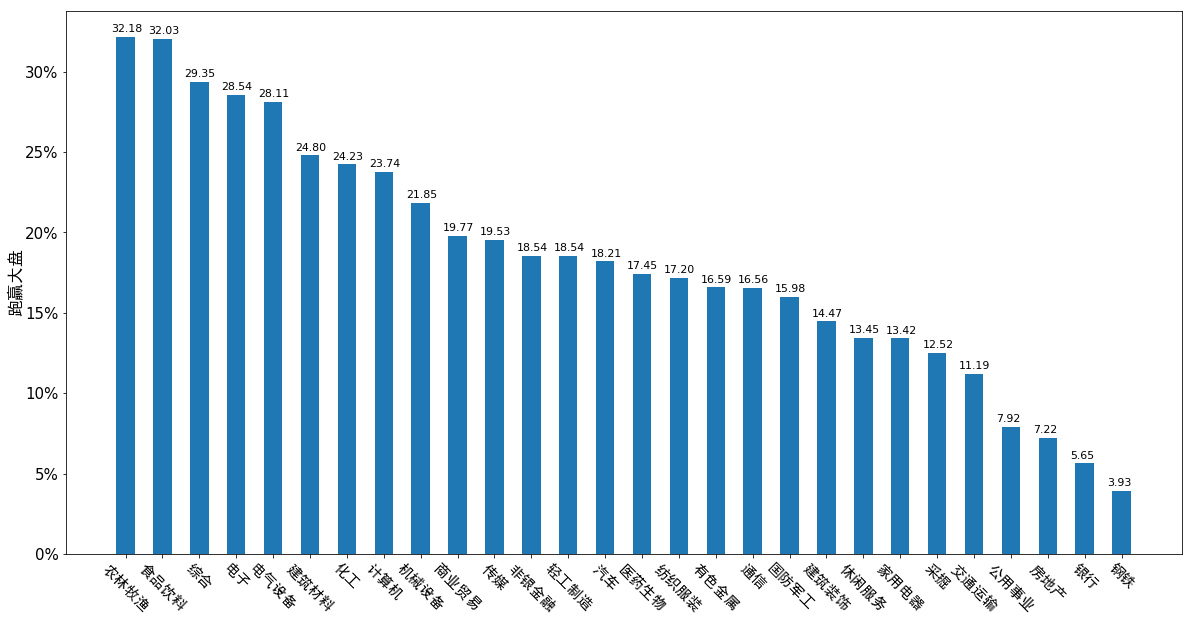

In [26]:
# 跑赢大盘的行业排名（申万行业）
# 取均值

df2 = df.groupby('申万行业')['跑赢大盘'].agg(np.mean)
df2 = df2.sort_values(ascending=False)

x_val = np.arange(len(df2.index))
x_label = df2.index.tolist()
y_val = df2.values.tolist()

plt.figure(figsize=(20, 10))
plt.bar(x_val, y_val, width=0.5)
plt.xticks(x_val, x_label, fontproperties=font, fontsize=15, rotation=-45.0)
plt.yticks(np.arange(0, 35, 5),[str(i)+'%' for i in np.arange(0, 35, 5)] ,fontsize=15)
plt.ylabel('跑赢大盘', fontproperties=font, fontsize=17, va='baseline')
for x, y in zip(x_val, y_val):
    plt.annotate("%.2f"%y, xy=(x,y), xytext=(x-0.4,y+0.3), fontsize=11)
plt.show()

## 2.2 跑赢大盘的个股

只做了前60只股票的视图

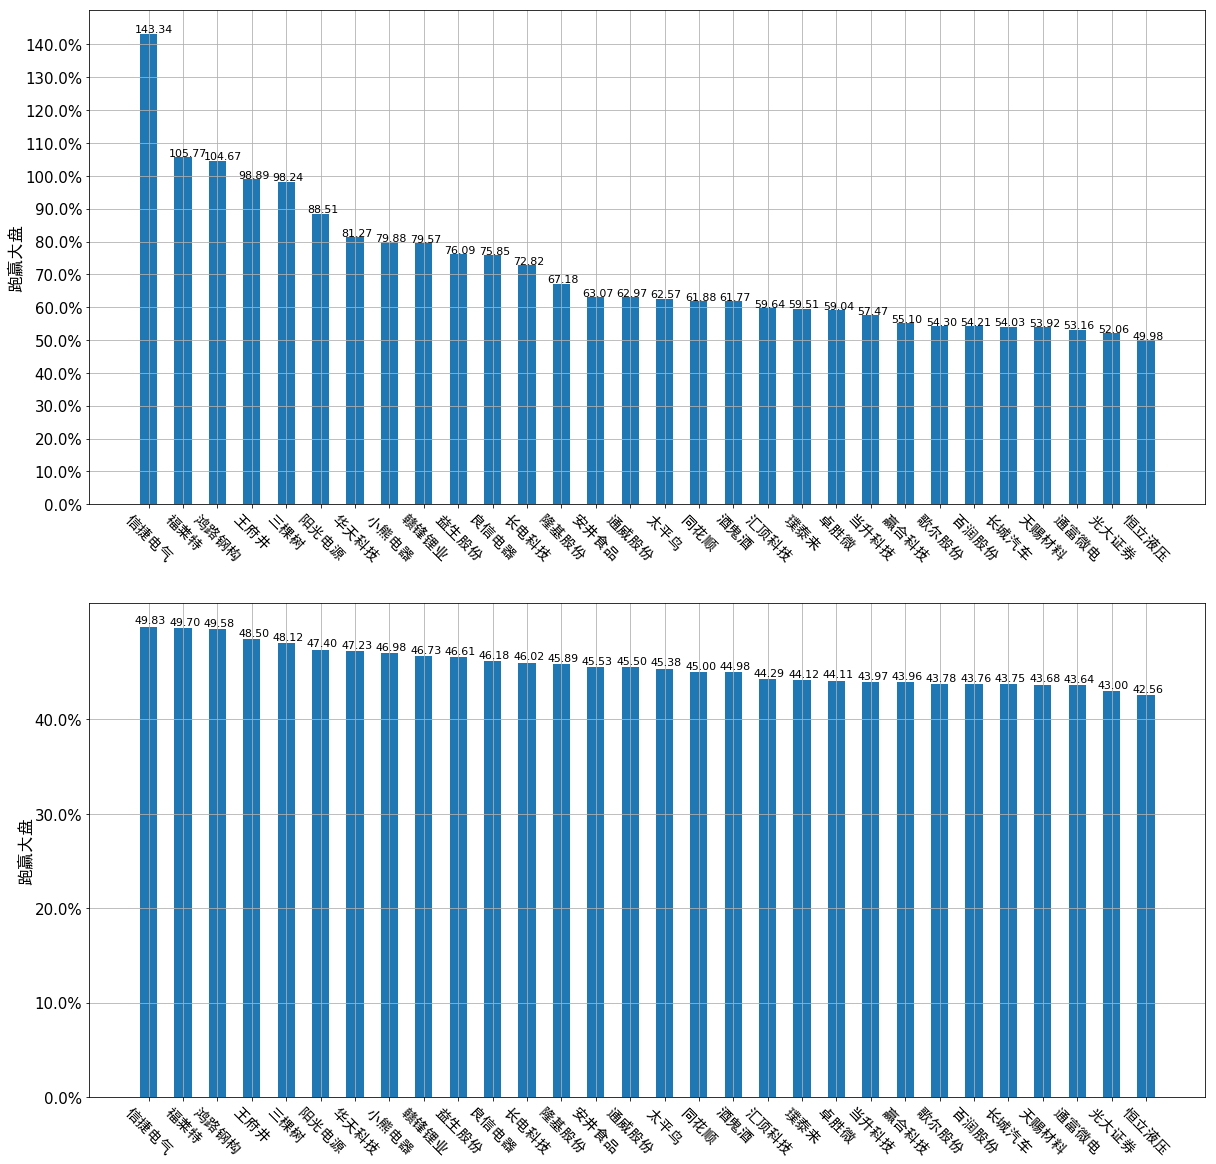

In [29]:
df3 = df.groupby('股票名称')['跑赢大盘'].agg(np.mean)
df3 = df3.sort_values(ascending=False)

x_val = np.arange(len(df3.index))
x_label = df3.index.tolist()
y_val = df3.values.tolist()

plt.figure(figsize=(20, 20))

def plt_bar(x_val, y_val):
    max_y = ((y_val[0] // 10) + 1) * 10
    plt.bar(x_val, y_val, width=0.5)
    plt.xticks(x_val, x_label, fontproperties=font, fontsize=15, rotation=-45.0)
    plt.yticks(np.arange(0, max_y, 10),[str(i)+'%' for i in np.arange(0, max_y, 10)] ,fontsize=15)
    plt.ylabel('跑赢大盘', fontproperties=font, fontsize=17, va='baseline')
    for x, y in zip(x_val, y_val):
        plt.annotate("%.2f"%y, xy=(x,y), xytext=(x-0.4,y+0.3), fontsize=11)
        
j = 1
for i in range(0, 60, 30):
    plt.subplot(2,1,j)
    plt_bar(x_val[i:i+30], y_val[i:i+30])
    plt.grid(True)
    j += 1


plt.show()

# 3. 买入盈利分析